# Automatic Feature Selection

## Introduction

- Feature selection is the process of selecting a subset of relevant features for use in model construction.
- Feature selection techniques are used for several reasons:
    - Simplification of models to make them easier to interpret by researchers/users.
    - Shorter training times.
    - To avoid the curse of dimensionality.
    - Enhanced generalization by reducing overfitting.
    - To improve the accuracy of a model.

## Univariate Statistics

- **Definition:**
   - **Univariate analysis** focuses on **one variable** at a time.
   - It provides insights into the basic features of a single variable within a dataset.
   - By summarizing and visualizing data distributions, univariate analysis helps analysts and researchers make informed decisions.

### Types of Univariate Statistics

- **ANOVA (Analysis of Variance):**
    - It is used to compare the means of three or more samples.
    - It tests the null hypothesis that samples in two or more groups are drawn from populations with the same mean values.
    - It is used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups.

- **Chi-Squared Test:**
    - It is used to determine whether there is a significant association between two categorical variables.
    - It is a non-parametric test that is used to test the null hypothesis that there is no difference between the observed and expected frequencies in one or more categories.

- **F-Test:**
    - It is used to compare the variances of two populations.
    - It is used to test the null hypothesis that the variances of two populations are equal.

- **T-Test:**
    - It is used to determine whether there is a significant difference between the means of two groups.
    - It is used to test the null hypothesis that the means of two populations are equal.

### Example

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import mglearn

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

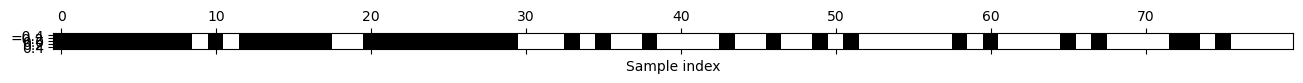

In [11]:
mask = select.get_support()
print(mask)
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

- Most of the selected features are the original features.
- Most of the noise featuers were removed.

In [12]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.951
Score with only selected features: 0.933


## Model-Based Feature Selection

- **Definition:**
    - Model-based feature selection uses a supervised machine learning model to judge the importance of each feature.
    - It selects features based on how important they are to the model's performance.
    - It is a wrapper method that uses the model to evaluate the importance of each feature.

### Types of Model-Based Feature Selection

- **Decision Trees-based models:**
    - They provide a `feature_importances_` attribute.
    - The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.

- **Linear Models:**
    - They provide a `coef_` attribute.
    - The absolute value of the coefficients can be used to determine the importance of the feature.

### Example

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

In [14]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'Sample index')

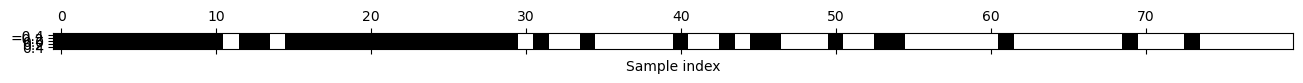

In [15]:
mask = select.get_support()
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [16]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=10000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.947


## Iterative Feature Selection

- **Definition:**
    - Iterative feature selection is a greedy optimization algorithm that selects features by recursively considering smaller and smaller sets of features.
    - It is a wrapper method that uses the model to evaluate the importance of each feature.

### Types of Iterative Feature Selection

- **Recursive Feature Elimination (RFE):**
    - It starts with all the features and removes the least important feature at each iteration.

- **Sequential Feature Selection:**
    - It starts with an empty set of features and adds the most important feature at each iteration.

### Example

Text(0.5, 0, 'Sample index')

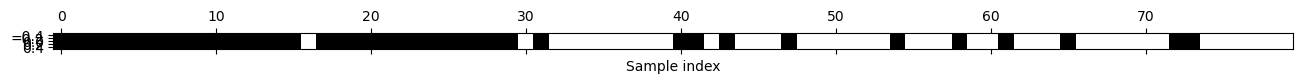

In [17]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [18]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=10000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


In [19]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.947
